# 군집 알고리즘

## 과일 사진 데이터 준비하기

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-12-10 11:46:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-12-10 11:46:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-12-10 11:46:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fruits = np.load('fruits_300.npy')

In [4]:
print(fruits.shape)

(300, 100, 100)


In [5]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


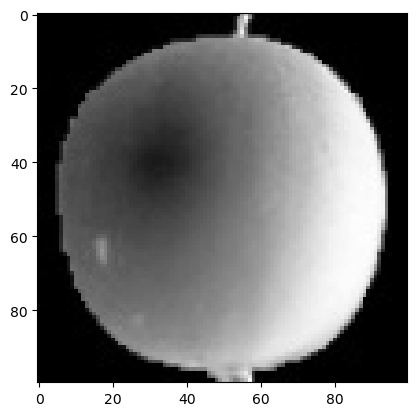

In [6]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

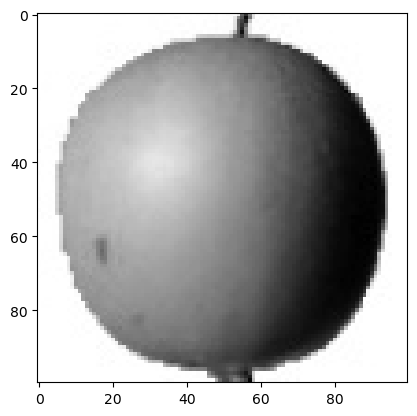

In [7]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

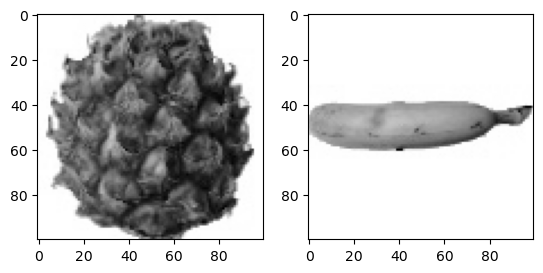

In [8]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 픽셀 값 분석하기

In [9]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [10]:
print(apple.shape)

(100, 10000)


In [11]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


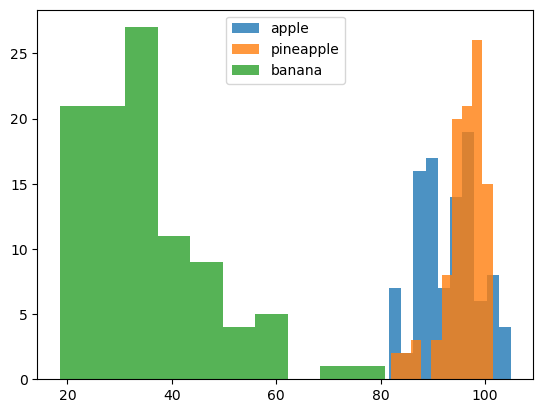

In [12]:
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
plt.legend()
plt.show()

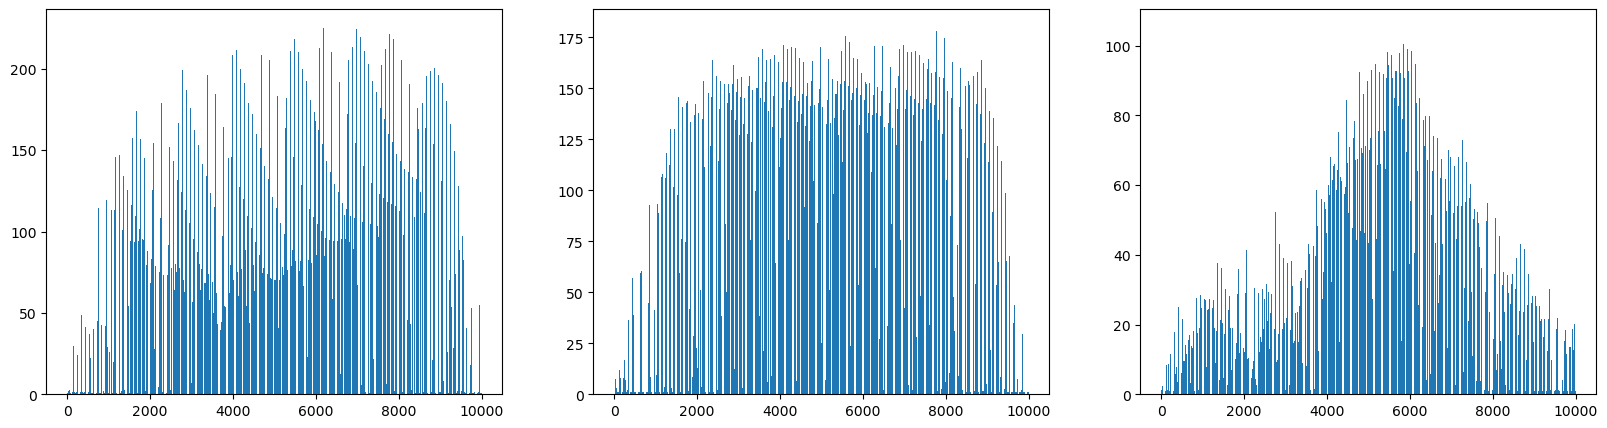

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

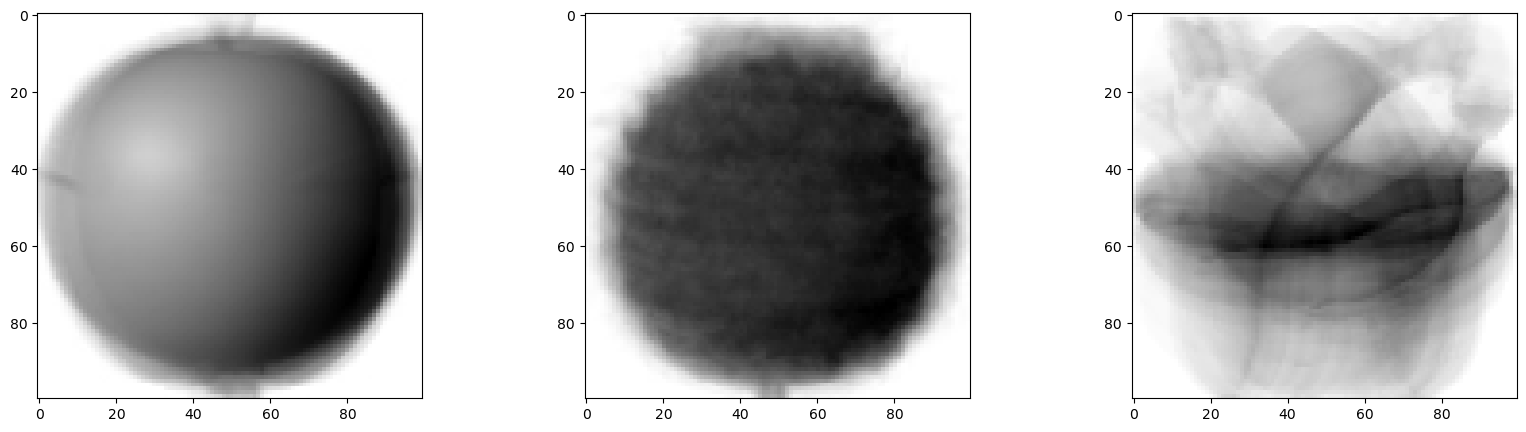

In [14]:
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [15]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


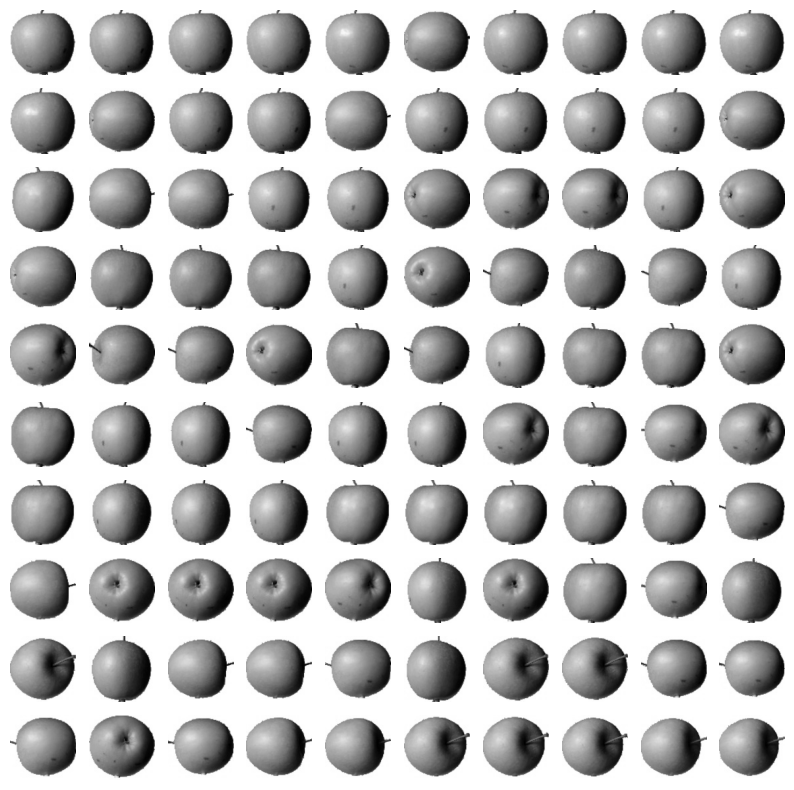

In [16]:
apple_index = np.argsort(abs_mean)[:100]
apple_index = apple_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i, j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

- 비지도 학습
    - 머신러닝의 한 종류로 훈련 데이터에 타깃이 없음.
    - 타깃이 없기 때문에 외부의 도움 없이 스스로 유용한 무언가를 학습해야 함.
    - 군집, 차원 축소
        - 대표적인 비지도 학습 작업
- 히스토그램
    - 구간별로 값이 발생한 빈도를 그래프로 표시한 것
    - 보통 x축이 값이 구간 (계급)
    - y축은 발생 빈도 (도수)
- 군집
    - 비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업
    - 클러스터
        - 군집 알고리즘으로 모든 샘플 그룹

### 확인문제
1. 히스토그램을 그릴 수 있는 맷플롯립 함수는 무엇인가요?
    1. hist()
    2. scatter()
    3. plot()
    4. bar()
    > 정답: 1

2. 막대 그래프를 그릴 수 있느 맷플롯립 함수는 무엇인가요?
    1. hist()
    2. scatter()
    3. plot()
    4. bar()
    > 정답: 4

3. 하나의 그림에 여러 개의 그래프를 그리기 위한 맷플롯립 함수는 무엇인가요?
    1. subplot
    2. subplots
    3. sub_plot
    4. sub_plots
    > 정답: 2

4. 본문에서 했던 것처럼 바나나 사진의 평균 banana_mean과 비슷한 사진 100장을 찾아 출력해 보세요. 바나나 사진을 모두 찾을 수 있나요?

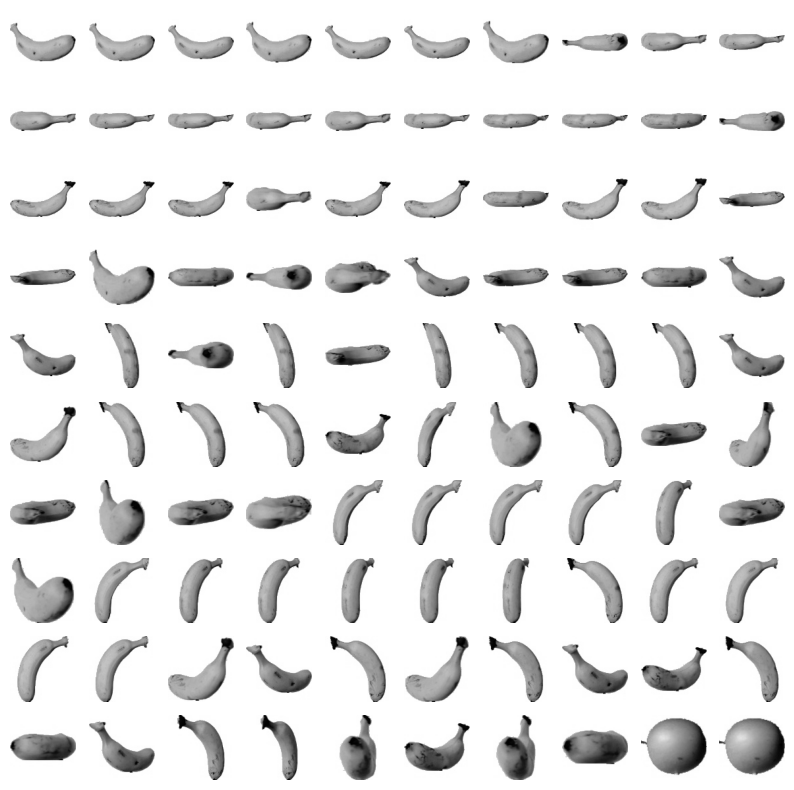

In [17]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
banana_index = banana_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i, j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

저 마지막에 사과같이 생긴놈 뭐냥...